In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# V2: Kamera-Versuch

### Daten vom Grauwertkeil visualisiert

100, 101, 102, 103, 105, 236, 237, 238, 239, 240, 241, 372, 373, 374, 375, 376, 377, 506, 507, 508, 509, 510, 511, 551, 

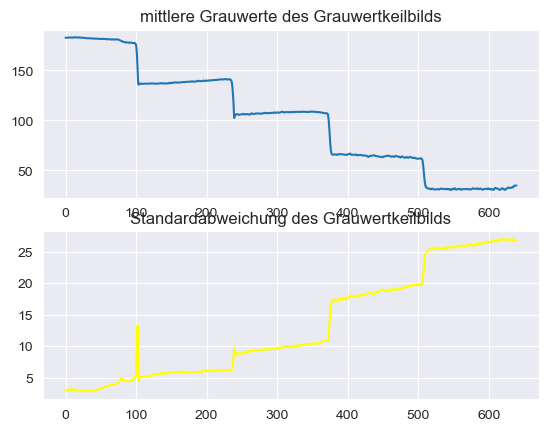

In [34]:
gwk = cv2.imread("./grauwertkeil.png")
grey = cv2.cvtColor(gwk, cv2.COLOR_BGR2GRAY)
#cv2.imshow("grauwertkeil", grey)
l = grey.shape[1]
gv = np.full((grey.shape[1]), 0, dtype=float)
gvsm = np.full(5, 0, dtype=float)
gvsstd = np.full(5, 0, dtype=float)
stdGV = np.full((grey.shape[1]), 0, dtype=float)
fig, splt = plt.subplots(2)
gw = 0
for i in range(0,grey.shape[1]):
    gv[i] = np.mean(grey[:,i])
    stdGV[i] = np.std(grey[:,i])
    if i > 0 and abs(gv[i-1] - gv[i]) > 1:
        print(i, end=", ")
splt[0].plot(range(0,gv.size),gv)
splt[1].plot(range(0,stdGV.size),stdGV, color='yellow')
splt[0].set_title("mittlere Grauwerte des Grauwertkeilbilds")
splt[1].set_title("Standardabweichung des Grauwertkeilbilds")
cv2.waitKey(0)
cv2.destroyAllWindows()

## A1 Mittelwerte und Standardabweichungen der Bereiche

Bereiche werden abgetrennt von Indizes welche eine relativ große Abweichung zum Index davor hatten

In [35]:
gvsm[0] = np.mean(grey[:,0:99])
gvsm[1] = np.mean(grey[:,106:235])
gvsm[2] = np.mean(grey[:,242:371])
gvsm[3] = np.mean(grey[:,378:505])
gvsm[4] = np.mean(grey[:,512:grey.shape[1]])

gvsstd[0] = np.std(grey[:,0:99])
gvsstd[1] = np.std(grey[:,106:235])
gvsstd[2] = np.std(grey[:,242:371])
gvsstd[3] = np.std(grey[:,378:505])
gvsstd[4] = np.std(grey[:,512:grey.shape[1]])

print(gvsm)
print(gvsstd)

[181.19252946 138.61543928 107.62650194  64.39957349  31.58331706]
[ 4.02602421  6.02818911  9.84735165 18.58766347 26.15016777]


## A2 Schwarzbilder

#### Mittelwertbild kontrastmaximiert dargestellt

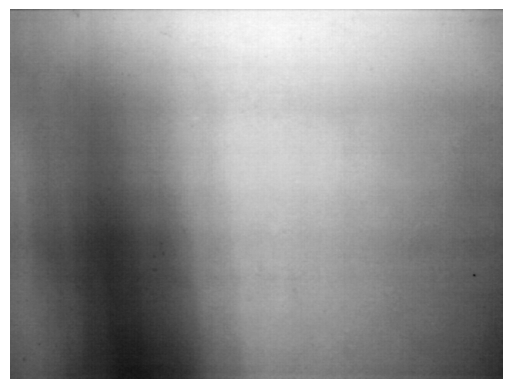

In [75]:
blackGVal = []

for i in range(0, 10):
    img = cv2.imread(f"./weiss{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
    blackGVal.append(gray)

blackGV = np.array(blackGVal)
mvpb = np.full(shape=(blackGV.shape[1], blackGV.shape[2]), fill_value=100, dtype=np.float64)
for i in range(0, blackGV.shape[1]):
    for j in range(0, blackGV.shape[2]):
        mvpb[i,j] = np.mean(blackGV[:,i,j])
mean_norm = (mvpb - np.min(mvpb)) / (np.max(mvpb) - np.min(mvpb))
mean_norm = (mean_norm * 255).astype(np.uint8)

plt.imshow(mean_norm, cmap='gray')
plt.axis('off')
plt.show()
